<a href="https://colab.research.google.com/github/tarun-kavipurapu/pytorch_practice/blob/main/pytorch_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn # conntains all pytorchs buildbblocs for nueral networks
import matplotlib.pyplot as plt



In [3]:
#create known parameters

weight  = 0.7

bias = 0.3


start = 0
end = 1
step = 0.02

X = torch.arange(start, end ,step).unsqueeze(dim=1)

y = weight*X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_test),len(y_test),len(X_train),len(y_train)

(10, 10, 40, 40)

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c='b',s=4,label = "Training data")
  plt.scatter(test_data,test_labels,c='g',s=4,label = "test data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c = 'r' ,s = 4, label = "Predictions")

  plt.legend(prop={"size":14});

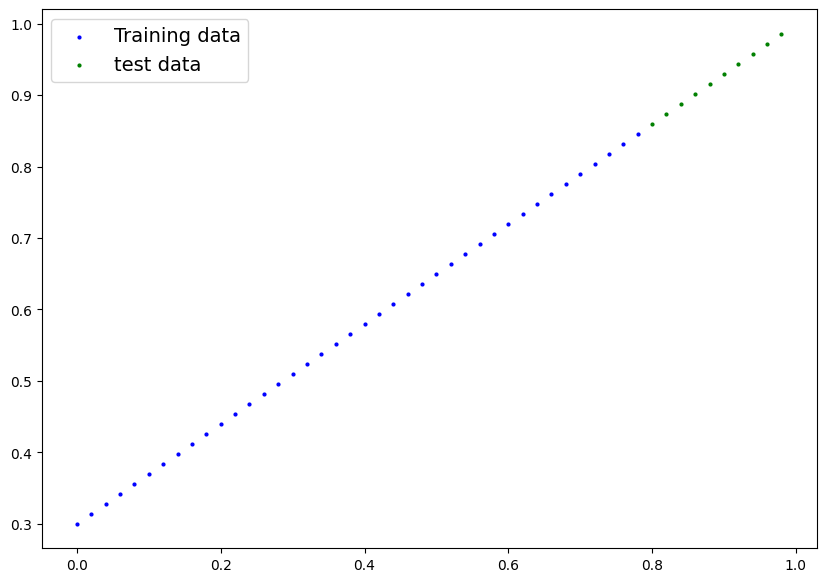

In [6]:
plot_predictions()

In [7]:
# Building a models
# linear regression model

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float),requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)


  def forward(self,x:torch.Tensor) -> torch.Tensor:
    #y = mx+c
    return  self.weights*x+self.bias



In [16]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [9]:
y_pred = None
with torch.inference_mode():
  y_pred = model_0(X_test)



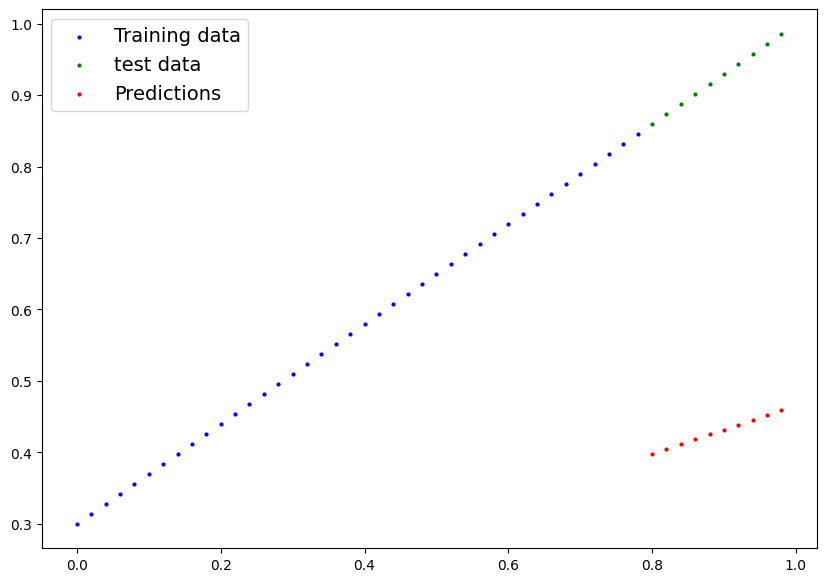

In [10]:
y_pred

plot_predictions(predictions = y_pred)

In [61]:
loss_fn = nn.L1Loss()  ##i am getting a mmuch better accuracy with MSE loss function

optimizer = torch.optim.SGD(params = model_0.parameters(),lr = 0.01)
test_pred=None

In [62]:
epochs = 1000

for epoch in range(epochs):
  #set to training mode
  model_0.train()

  #get predicted value this will  forword passs and get us the values oof y
  y_pred = model_0(X_train)

  #calculate loss
  loss = loss_fn(y_pred,y_train)

  #pytorch accumilates optimizers on default so we need to zero them out
  optimizer.zero_grad()#why should we use this find out


  # perform backpropagation
  loss.backward()

  #step the optimizer it is performing the gradiet descent by the optimizzer that we have set
  optimizer.step()

  model_0.eval()##turns off settings not needed for evaluation (learn more about dropout and batch norm layers)

  with torch.inference_mode():
    #first forward pass
    test_pred = model_0(X_test)

    #2. calculate loss

    test_loss = loss_fn(test_pred,y_test)



  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Train loss: 6.676465091004502e-06 | Test loss: 0.0010861098999157548
Epoch: 100 | Train loss: 0.003963343799114227 | Test loss: 0.00889599323272705
Epoch: 200 | Train loss: 0.003963343799114227 | Test loss: 0.00889599323272705
Epoch: 300 | Train loss: 0.003963343799114227 | Test loss: 0.00889599323272705
Epoch: 400 | Train loss: 0.003963343799114227 | Test loss: 0.00889599323272705
Epoch: 500 | Train loss: 0.003963343799114227 | Test loss: 0.00889599323272705
Epoch: 600 | Train loss: 0.003963343799114227 | Test loss: 0.00889599323272705
Epoch: 700 | Train loss: 0.003963343799114227 | Test loss: 0.00889599323272705
Epoch: 800 | Train loss: 0.003963343799114227 | Test loss: 0.00889599323272705
Epoch: 900 | Train loss: 0.003963343799114227 | Test loss: 0.00889599323272705


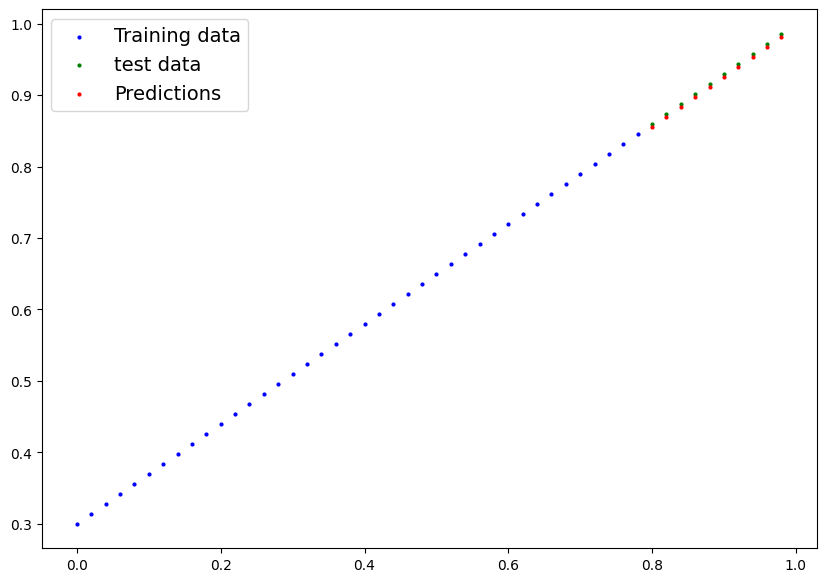

In [63]:
plot_predictions(predictions  = test_pred)

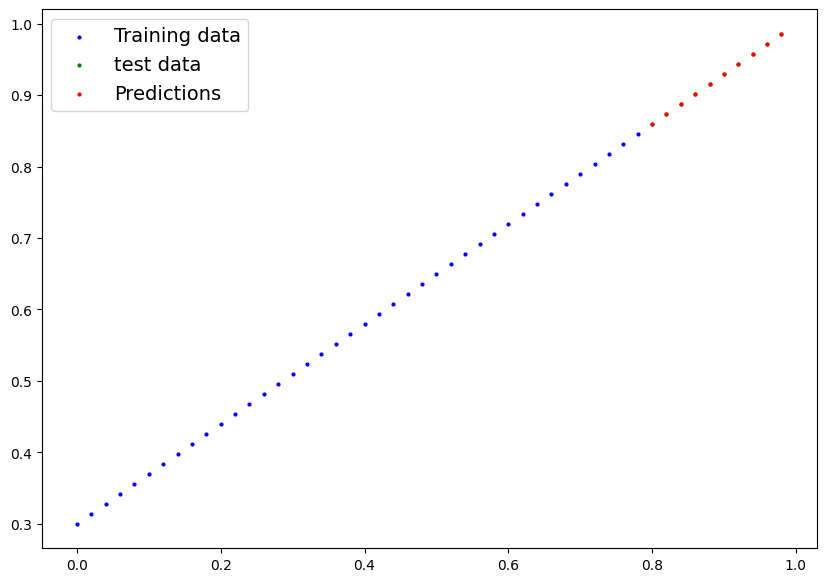

In [64]:
plot_predictions(predictions  = y_test)

In [56]:
test_pred

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [58]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])